https://bhaskarvk.github.io/2015/01/how-to-use-twitters-search-rest-api-most-effectively./#:~:text=To%20start%20with%20the%20API,window%20for%20per-user%20authentication

In [1]:
%matplotlib inline

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import tweepy

In [2]:
ACCESS_TOKEN = '592114533-xnObSN81BhSxpocYERsOMaL2TN2LGyansX29mosK'
ACCESS_SECRET = 'uiOu2dlN94UyJT6uyVa5ks9Zq3C8qf5BiWVBXtsQOXlKL'

CONSUMER_API_KEY = 'Q1dUm2cJFtPx8Zd4EWfg25Z0y'
CONSUMER_API_SECRET = '5foYoyxYAVse4gjPiryPy95lzaff0eKlpm1topxQMKUIl7CQv2'

In [75]:
UTM_ZONE = 18
UTM_CRS = {'ellps': 'WGS84', 'datum':'WGS84', 
          'proj': 'utm', 'units': 'km', 'no_defs': True, 'zone': UTM_ZONE}

In [3]:
# Authenticate to Twitter
auth = tweepy.OAuthHandler(CONSUMER_API_KEY, CONSUMER_API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

# Create API object
api = tweepy.API(auth, wait_on_rate_limit=True,
    wait_on_rate_limit_notify=True)

In [113]:
# load map of nyc
city = gpd.read_file(gpd.datasets.get_path('nybb')).to_crs(UTM_CRS)

In [165]:
pts = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Point",
        "coordinates": [
          -73.98571014404297,
          40.749987956993444
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Point",
        "coordinates": [
          -73.95309448242188,
          40.79847692585981
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Point",
        "coordinates": [
          -73.95549774169922,
          40.71343536379427
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Point",
        "coordinates": [
          -73.9438247680664,
          40.650950330810694
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Point",
        "coordinates": [
          -73.91738891601562,
          40.69755930345006
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Point",
        "coordinates": [
          -73.89404296875,
          40.7519385984599
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Point",
        "coordinates": [
          -74.14672851562499,
          40.5902317484185
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Point",
        "coordinates": [
          -73.80718231201172,
          40.69235321394895
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Point",
        "coordinates": [
          -73.80615234375,
          40.7542792926831
        ]
      }
    }
  ]
}
pts = pts['features']

In [174]:
KM_BUFF = 6

In [175]:
def fmt_geocode(point,rad_km=0.5):
    coords = [x[0] for x in point.coords.xy]
    return f"{coords[1]},{coords[0]},{rad_km}km"

In [176]:
def run_search(geocode):
    return api.search(q="min_faves:5 blm", lang="en", count=100, geocode=geocode, result_type='recent')

In [177]:
df = (gpd.GeoDataFrame.from_features(pts, crs='epsg:4326')
     .assign(search_geocode=lambda gdf: gdf.geometry.apply(fmt_geocode, rad_km=KM_BUFF))
     .reset_index())
df_utm = df.to_crs(UTM_CRS).assign(geometry=lambda gdf: gdf.buffer(KM_BUFF))

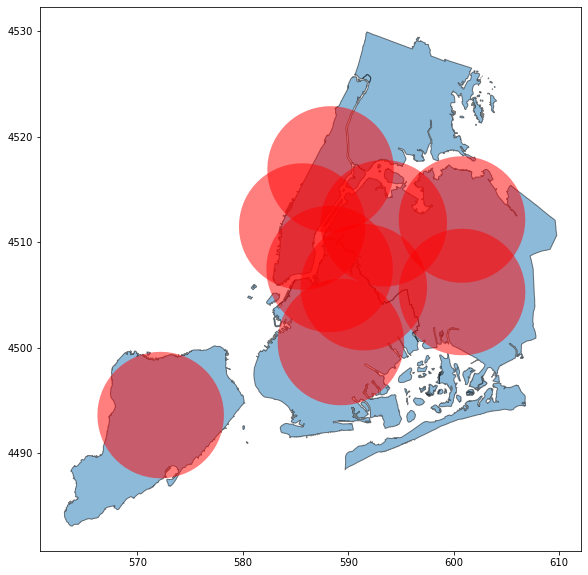

In [178]:
ax = city.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
df_utm.plot(color='red', ax=ax, alpha=0.5)

In [179]:
res = {row['index']: run_search(row.search_geocode) for i, row in df.iterrows()}

In [180]:
df_utm.loc[:, 'result_count'] = df_utm['index'].apply(lambda i: len(res[i]))

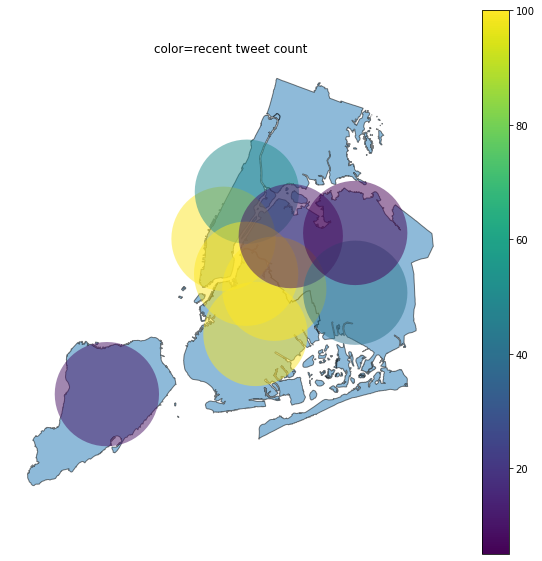

In [183]:
ax = city.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
df_utm.plot('result_count', ax=ax, alpha=0.5, legend=True)
plt.axis('off')
plt.title('color=recent tweet count');

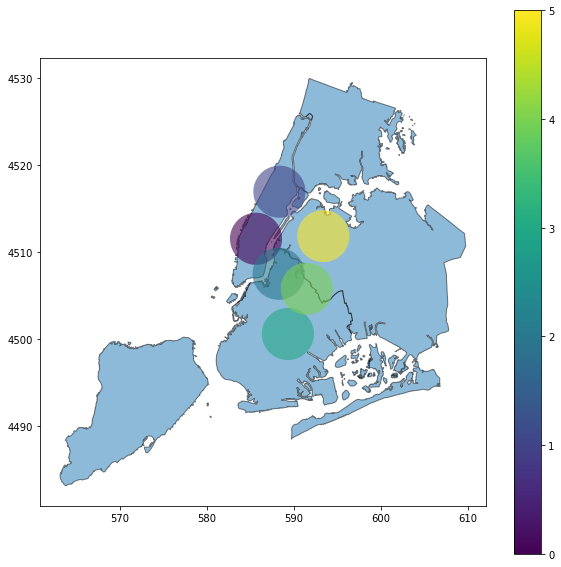

In [154]:
ax = city.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
df_utm.plot('index', ax=ax, alpha=0.6, legend=True)

In [149]:
df_utm

,index,geometry,search_geocode,result_count
0,0,"POLYGON ((588.626 4511.499, 588.611 4511.205, ...","40.749987956993444,-73.98571014404297,3km",7
1,1,"POLYGON ((591.315 4516.914, 591.300 4516.620, ...","40.79847692585981,-73.95309448242188,3km",36
2,2,"POLYGON ((591.224 4507.471, 591.210 4507.177, ...","40.71343536379427,-73.95549774169922,3km",5
3,3,"POLYGON ((592.294 4500.547, 592.279 4500.253, ...","40.650950330810694,-73.9438247680664,3km",30
4,4,"POLYGON ((594.465 4505.748, 594.451 4505.454, ...","40.69755930345006,-73.91738891601562,3km",0
5,5,"POLYGON ((596.361 4511.809, 596.347 4511.515, ...","40.7519385984599,-73.89404296875,3km",0
